In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as kikin

In [13]:
def dilatacion_manual(imagen_binaria, kernel):
    img_height, img_width = imagen_binaria.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(imagen_binaria, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    eroded_image = np.zeros_like(imagen_binaria)
    
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Comprobar si todos los elementos del kernel coinciden con la región
            if np.min(region[kernel == 1]) == 255:
                eroded_image[i, j] = 255
            else:
                eroded_image[i, j] = 0
                
    return eroded_image

In [14]:
# Cargar la imagen en escala de grises
imagen = cv2.imread('img/car.jpg', cv2.IMREAD_GRAYSCALE)
_, imagen_binaria = cv2.threshold(imagen, 128, 255, cv2.THRESH_BINARY)

# Definir diferentes kernels
kernel_cuadrado = np.ones((3, 3), np.uint8)
kernel_cruz = np.array([[0, 0, 1, 0, 0], 
                        [0, 1, 1, 1, 0], 
                        [1, 1, 1, 1, 1], 
                        [0, 1, 1, 1, 0], 
                        [0, 0, 1, 0, 0]], np.uint8)

# Aplicar la erosión con diferentes kernels
imagen_dilatada_cuadrado = dilatacion_manual(imagen_binaria, kernel_cuadrado)
imagen_dilatada_cruz = dilatacion_manual(imagen_binaria, kernel_cruz)

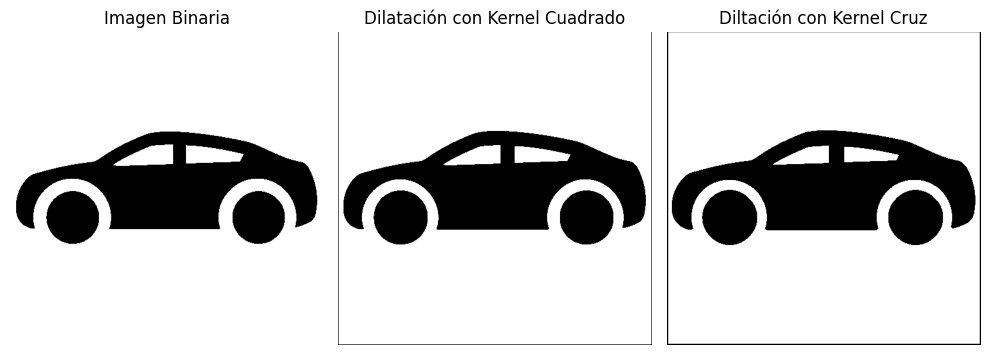

In [15]:
# Mostrar las imágenes
kikin.figure(figsize=(10, 5))

kikin.subplot(1, 3, 1)
kikin.title('Imagen Binaria')
kikin.imshow(imagen_binaria, cmap='gray')
kikin.axis('off')

kikin.subplot(1, 3, 2)
kikin.title('Dilatación con Kernel Cuadrado')
kikin.imshow(imagen_dilatada_cuadrado, cmap='gray')
kikin.axis('off')

kikin.subplot(1, 3, 3)
kikin.title('Diltación con Kernel Cruz')
kikin.imshow(imagen_dilatada_cruz, cmap='gray')
kikin.axis('off')

kikin.tight_layout()
kikin.show()